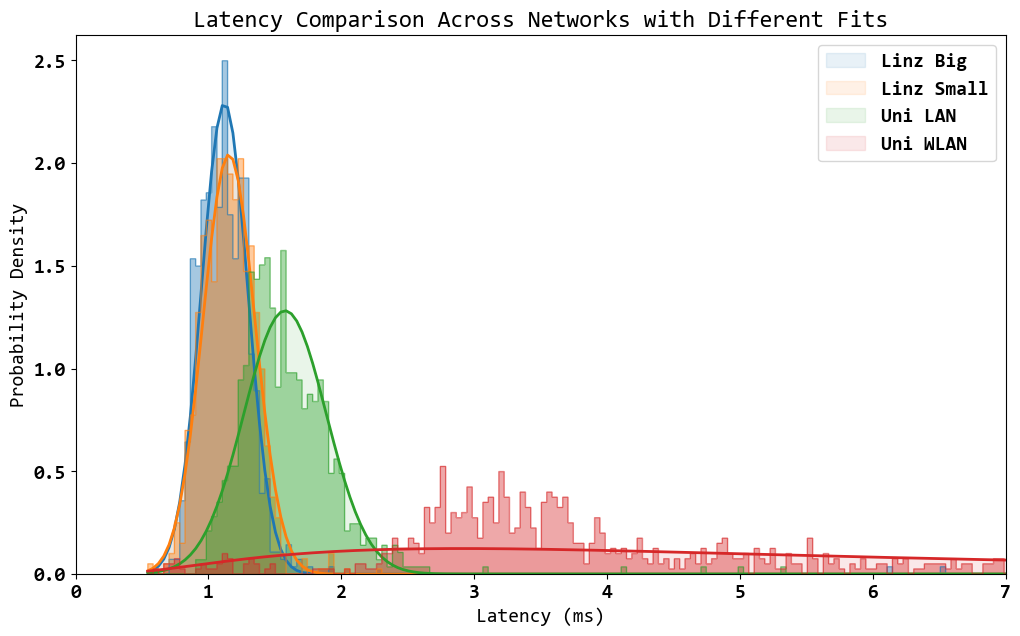

In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

font = {'family' : 'Consolas',
        'weight' : 'bold',
        'size'   : 14}

mpl.rc('font', **font)

# Function to load latency data from a file
def load_latency_data(file_path):
    with open(file_path, 'r') as file:
        data = file.read().split()
    return [float(i) / 2 for i in data]

# Paths to your files
file_paths = {
    'Linz Big': 'linz_big.txt',
    'Linz Small': 'linz_small.txt',
    'Uni LAN': 'uni_lan.txt',
    'Uni WLAN': 'uni_wlan.txt'
}

def remove_outliers(data, threshold=5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return [x for x in data if lower_bound <= x <= upper_bound]


# Load all data and flatten into a single list for bin computation
all_latencies = []
for path in file_paths.values():
    all_latencies.extend(load_latency_data(path))

# Calculate common bins for all histograms
bin_width = 0.04
min_latency = min(all_latencies)
max_latency = max(all_latencies)
num_bins = int((max_latency - min_latency) / bin_width)
bins = np.linspace(min_latency, max_latency, num_bins)

# Plotting histograms and Gaussian fits for each file
plt.figure(figsize=(12, 7))

colors = ['C0', 'C1', 'C2', 'C3']  # Color for each dataset

for i, (label, path) in enumerate(file_paths.items()):
    latencies = load_latency_data(path)
    latencies_fixed = remove_outliers(latencies)
    
    # Plot the histogram
    count, _, _ = plt.hist(latencies, bins=bins, alpha=0.4, density=True, color=colors[i])
    _, _, _ = plt.hist(latencies, bins=bins, alpha=0.6, density=True, color=colors[i], histtype='step')
    
    if label == 'Uni WLAN':
        # Fit a Log-Normal distribution for the WLAN data
        shape, loc, scale = lognorm.fit(latencies_fixed, floc=0)
        x = np.linspace(min_latency, max_latency, num_bins)
        p = lognorm.pdf(x, shape, loc, scale)
        #plt.text(scale + 0.5, max(p) + 0.01, f'{label} Log-Normal', ha='center')
    else:
        # Fit a Gaussian distribution for the other data sets
        mu, std = norm.fit(latencies_fixed)
        x = np.linspace(min_latency, max_latency, num_bins)
        p = norm.pdf(x, mu, std)
    
        #plt.text(mu + 0.5, max(p) + 0.01, f'{label} μ={mu:.2f}, σ={std:.2f}', ha='left')
    
    # Fill the area under the curve with the same color as the histogram
    plt.plot(x, p, linewidth=2)
    plt.fill_between(x, p, color=colors[i], alpha=0.1, label=label)

# Customize the plot
plt.xlabel('Latency (ms)')
plt.ylabel('Probability Density')
plt.title('Latency Comparison Across Networks with Different Fits')
plt.legend()
plt.xlim(0, 7)

# Show the plot
plt.show()